In [1]:
#building a model to predict food prices in Turkey
#credit to kaggle for dataset

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [3]:
#loading the datasets
train=pd.read_csv('C://Users/sojore/Documents/food prices in turkey/train.csv')
test=pd.read_csv('C://Users/sojore/Documents/food prices in turkey/test.csv')
train.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
#exploring the train dataset
train.groupby('Place')['Price'].agg('count')

Place
Ankara              1582
Istanbul            1583
Izmir               1583
National Average    2633
Name: Price, dtype: int64

In [5]:
train.shape

(7381, 8)

In [6]:
train.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [34]:
#concatenating both train and test datasets
df_1=pd.concat([train,test])
df_1.shape

(8249, 8)

In [36]:
df_1.sample(6)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
672,Izmir,92,Eggs - Retail,33,Unit,2,2021,1.0059
386,Ankara,414,Cheese - Retail,5,KG,3,2021,27.9313
6671,Izmir,281,Tea - Retail,5,KG,6,2018,29.7429
1605,National Average,254,Bananas - Retail,5,KG,10,2016,5.8500
2406,National Average,450,Zucchini - Retail,5,KG,12,2019,4.3029
6313,Izmir,173,Onions - Retail,5,KG,12,2017,1.4520


In [37]:
df_1.dtypes

Place           object
ProductId        int64
ProductName     object
UmId             int64
UmName          object
Month            int64
Year             int64
Price          float64
dtype: object

In [38]:
df=df_1.copy()
df.Place.unique()

array(['National Average', 'Ankara', 'Istanbul', 'Izmir'], dtype=object)

In [39]:
test.Place.unique()

array(['National Average', 'Ankara', 'Istanbul', 'Izmir'], dtype=object)

In [40]:
len(df.ProductName.unique())

52

In [41]:
len(test.ProductName.unique())

45

In [42]:
df.UmId.unique()

array([  5,  33,  15,  55,  90,  51, 101, 102, 100], dtype=int64)

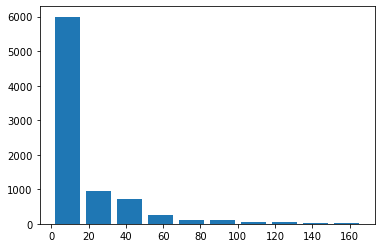

In [43]:
plt.hist(df.Price,rwidth=0.8)
plt.show()

In [44]:
#handling outliers
df['price_per_UmId']=df['Price']/df['UmId']
df.head(2)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,price_per_UmId
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,0.89840
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,0.91572


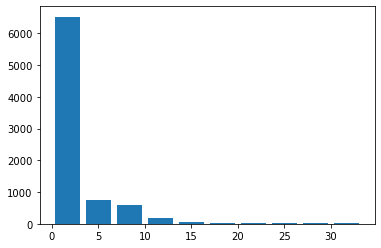

In [45]:
plt.hist(df.price_per_UmId,rwidth=0.8)
plt.show()

In [46]:
df['UmId2']=df['UmId']**2
df['price_per_UmId2']=df['price_per_UmId']**2
df.sample(4)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,price_per_UmId,UmId2,price_per_UmId2
388,Ankara,414,Cheese - Retail,5,KG,5,2021,29.0296,5.805920,25,33.708707
4747,Istanbul,173,Onions - Retail,5,KG,5,2019,3.7258,0.745160,25,0.555263
7222,Izmir,463,Milk (pasteurized) - Retail,15,L,10,2018,4.5215,0.301433,225,0.090862
6852,Izmir,345,Apples - Retail,5,KG,7,2018,4.7606,0.952120,25,0.906532


In [47]:
ll1=df.Price.quantile(0.01)
ul1=df.Price.quantile(0.99)
df[(df.Price<=ll1) | (df.Price>=ul1)]
df1=df[(df.Price>ll1) & (df.Price<ul1)]
df1.shape

(8081, 11)

In [48]:
ll2=df1.price_per_UmId.quantile(0.01)
ul2=df1.price_per_UmId.quantile(0.99)
df1[(df1.price_per_UmId<=ll2) | (df1.price_per_UmId>=ul2)]
df2=df1[(df1.price_per_UmId>ll2) & (df1.price_per_UmId<ul2)]
df2.shape

(7914, 11)

In [49]:
ll3=df2.price_per_UmId2.quantile(0.01)
ul3=df2.price_per_UmId2.quantile(0.99)
df2[(df2.price_per_UmId2<=ll3) | (df2.price_per_UmId2>=ul3)]
df3=df2[(df2.price_per_UmId2>ll3) & (df2.price_per_UmId2<ul3)]
df3.shape

(7754, 11)

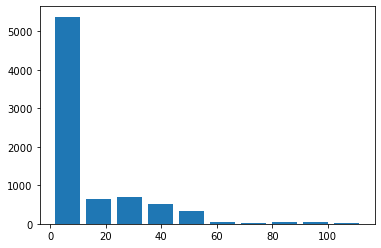

In [50]:
plt.hist(df3.Price,rwidth=0.8)
plt.show()

In [51]:
df3['UmId23']=(df3['UmId2']/3 +df3['price_per_UmId'])
df3.head()

<ipython-input-51-0395ce940927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['UmId23']=(df3['UmId2']/3 +df3['price_per_UmId'])


,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,price_per_UmId,UmId2,price_per_UmId2,UmId23
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,0.89840,25,0.807123,9.231733
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,0.91572,25,0.838543,9.249053
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,0.95730,25,0.916423,9.290633
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,1.02674,25,1.054195,9.360073
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,1.10198,25,1.214360,9.435313


In [52]:
ll4=df3.UmId23.quantile(0.01)
ul4=df3.UmId23.quantile(0.99)
df3[(df3.UmId23<=ll4) | (df3.UmId23>=ul4)]
df4=df3[(df3.UmId23>ll4) & (df3.UmId23<ul4)]
df4.shape

(7598, 12)

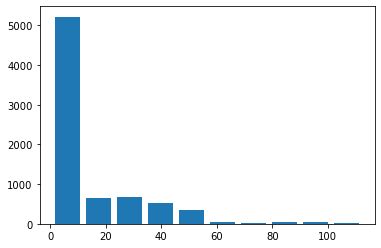

In [53]:
plt.hist(df4.Price,rwidth=0.8)
plt.show()

In [54]:
df4.head(2)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,price_per_UmId,UmId2,price_per_UmId2,UmId23
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,0.89840,25,0.807123,9.231733
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,0.91572,25,0.838543,9.249053


In [55]:
df5=df4.drop(['price_per_UmId','UmId2','price_per_UmId2','UmId23'],axis='columns')
df5.head(3)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865


In [56]:
df5.UmName.unique()

array(['KG', 'Unit', 'L', 'Course', '12 KG', 'Day', 'Package',
       'Cubic meter'], dtype=object)

In [57]:
df5[df5.UmName=='12 KG']

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
1883,National Average,341,Fuel (gas) - Retail,90,12 KG,6,2015,63.4300
1884,National Average,341,Fuel (gas) - Retail,90,12 KG,7,2015,63.0500
1885,National Average,341,Fuel (gas) - Retail,90,12 KG,8,2015,62.6300
1886,National Average,341,Fuel (gas) - Retail,90,12 KG,9,2015,62.7600
1887,National Average,341,Fuel (gas) - Retail,90,12 KG,10,2015,62.7600
...,...,...,...,...,...,...,...,...
571,Istanbul,341,Fuel (gas) - Retail,90,12 KG,2,2021,7.2269
572,Istanbul,341,Fuel (gas) - Retail,90,12 KG,3,2021,7.1713
787,Izmir,341,Fuel (gas) - Retail,90,12 KG,1,2021,7.3209
788,Izmir,341,Fuel (gas) - Retail,90,12 KG,2,2021,7.3257


In [58]:
df6=df5[df5.UmName!='12 KG']
df6.shape

(7432, 8)

In [59]:
df6.UmName.unique()

array(['KG', 'Unit', 'L', 'Course', 'Day', 'Package', 'Cubic meter'],
      dtype=object)

In [60]:
df6.sample(3)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
4412,Istanbul,94,Meat (chicken) - Retail,5,KG,6,2018,10.8180
426,Ankara,493,Water - Retail,100,Cubic meter,3,2021,5.2435
5897,Izmir,66,Beans (white) - Retail,5,KG,4,2019,11.5679


In [61]:
#dropping more unnecessary columns
df7=df6.drop(['ProductId','Month','Year'],axis='columns')
df7.head(2)

,Place,ProductName,UmId,UmName,Price
0,National Average,Rice - Retail,5,KG,4.4920
1,National Average,Rice - Retail,5,KG,4.5786


In [62]:
#getting dummy values for categorical columnns
from sklearn.preprocessing import LabelEncoder
le_Place=LabelEncoder()
le_ProductName=LabelEncoder()
le_UmName=LabelEncoder()
df7['Place']=le_Place.fit_transform(df7['Place'])
df7['ProductName']=le_ProductName.fit_transform(df7['ProductName'])
df7['UmName']=le_UmName.fit_transform(df7['UmName'])
df7.head()

,Place,ProductName,UmId,UmName,Price
0,3,34,5,3,4.4920
1,3,34,5,3,4.5786
2,3,34,5,3,4.7865
3,3,34,5,3,5.1337
4,3,34,5,3,5.5099


In [100]:
df7.Place=pd.to_numeric(df7['Price']).astype('int64')
df7.ProductName=pd.to_numeric(df7['ProductName']).astype('int64')
df7.UmName=pd.to_numeric(df7['UmName']).astype('int64')

In [101]:
df7.dtypes

Place            int64
ProductName      int64
UmId             int64
UmName           int64
Price          float64
dtype: object

In [102]:
#spliting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df7.drop('Price',axis='columns'),df7.Price,test_size=0.2)

In [103]:
X_train.shape

(5945, 4)

In [104]:
len(y_test)

1487

In [105]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [106]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [107]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.999592,{'normalize': True}
1,lasso,0.999565,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.995513,"{'criterion': 'mse', 'splitter': 'best'}"


In [108]:
#i will choose decision_tree to train and build a model
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [109]:
model.score(X_test,y_test)

0.9994881963744725

In [110]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([ 7.32137105, 41.6872    ,  3.49455   , 22.1673    , 10.53119167,
        2.79104118,  6.0857    ,  3.45010145,  3.50162927,  4.33773514])

In [111]:
y_test[:10]

546      7.0800
7358    41.1896
5862     3.8631
4628    22.1323
465     10.7000
4040     2.9830
684      6.0756
6634     3.3159
688      3.8089
3698     4.6356
Name: Price, dtype: float64

In [125]:
#converting y_predicted and y_test into an int vals
def convert_to_int(vals):
    for i in vals:
        return int(round(i,0))

In [126]:
convert_to_int([4.6356])

5

In [135]:
y_pred=[]  #working pretty good as expected (aim is to get rid of continous data(decimal places) which are aint supported) by 
#the confusion matrix and classification report
for i in y_predicted:
    x=int(round(i,0))
    y_pred.append(x)
    
y_pred[:5]

[7, 42, 3, 22, 11]

In [136]:
y_predicted[:5]

array([ 7.32137105, 41.6872    ,  3.49455   , 22.1673    , 10.53119167])

In [137]:
y_test[:5]

546      7.0800
7358    41.1896
5862     3.8631
4628    22.1323
465     10.7000
Name: Price, dtype: float64

In [138]:
y_test1=[]
for i in y_test:
    y=int(round(i,0))
    y_test1.append(y)
y_test1[:5]            #looking pretty good

[7, 41, 4, 22, 11]

Text(159.0, 0.5, 'Truth')

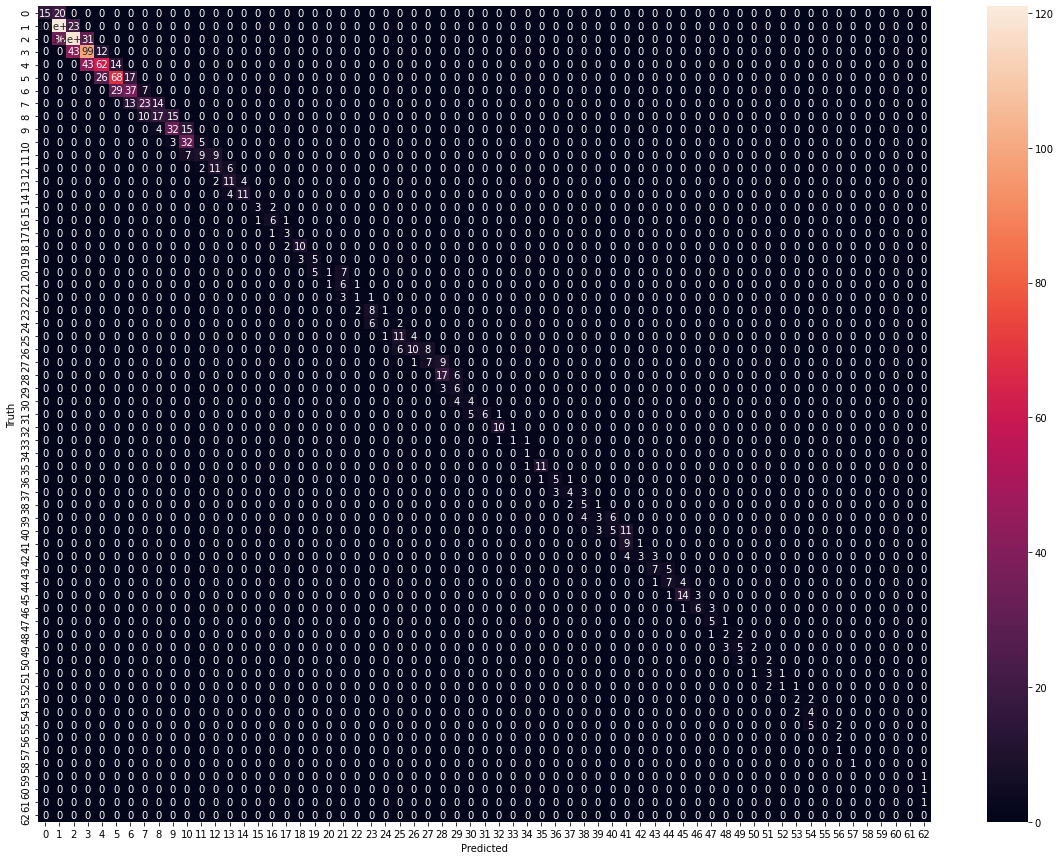

In [143]:
##from the above predictions ,my model is absolutely predicting the correct results
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test1,y_pred)
plt.figure(figsize=(20,15))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [144]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test1,y_pred))

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.43      0.60        35
           2       0.68      0.84      0.75       144
           3       0.64      0.64      0.64       186
           4       0.57      0.64      0.61       154
           5       0.62      0.52      0.57       119
           6       0.61      0.61      0.61       111
           7       0.55      0.51      0.53        73
           8       0.57      0.46      0.51        50
           9       0.49      0.40      0.44        42
          10       0.64      0.63      0.63        51
          11       0.59      0.80      0.68        40
          12       0.56      0.36      0.44        25
          13       0.50      0.58      0.54        19
          14       0.52      0.65      0.58        17
          15       0.73      0.73      0.73        15
          16       0.75      0.60      0.67         5
          17       0.67      0.75      0.71         8
  